# Healthcare Lab (Clustering)

**Learning Objectives:**
  * Apply clustering techniques
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


# Context of the Analysis

### Objective - We want to train a ML based classifier able to identify patients at risk of experiencing life threatening events.
#### The classifier relies on patients' medical history.


## 1. Library Import

In [1]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

In [4]:
import warnings
warnings.filterwarnings("ignore")

## 2. Data loading and DataFrame creation

In [5]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [6]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [7]:
HealthCareDataSet.describe()

,Id,ClaimItem,StartDate,EndDate,RevenueCode,BirthDate,TotalExpenses
count,52563.000000,52563.000000,52563,52563,52563.000000,52563,52563.000000
mean,685655.197953,12.023990,2020-06-21 00:12:27.902516992,2020-06-24 21:03:58.958963200,386.321995,1948-05-11 14:05:37.378003712,2735.230373
min,634363.000000,1.000000,2020-01-01 00:00:00,2020-01-01 00:00:00,24.000000,1921-01-18 00:00:00,0.000000
25%,658574.500000,5.000000,2020-03-09 00:00:00,2020-03-13 00:00:00,301.000000,1939-11-10 00:00:00,194.642000
50%,684404.000000,10.000000,2020-06-22 00:00:00,2020-06-26 00:00:00,307.000000,1947-05-12 00:00:00,675.262000
75%,712375.500000,16.000000,2020-09-25 00:00:00,2020-09-29 00:00:00,450.000000,1953-12-02 00:00:00,2309.265000
max,741736.000000,127.000000,2020-12-31 00:00:00,2020-12-31 00:00:00,942.000000,1999-08-09 00:00:00,504533.400000
std,30913.839360,10.747558,NaN,NaN,158.551733,NaN,8292.178928


In [8]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [9]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [10]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

,AgeAtMedicalEvent
0,52.657084
1,52.657084
2,52.657084
3,52.657084
4,52.657084
...,...
52558,80.637919
52559,70.258727
52560,70.258727
52561,70.258727


In [11]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [12]:
## We need to compute the duration of each Medical Treatment
HealthCareDataSet['MedicalTreatmentDuration']=(HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']).dt.days

In [13]:
# prompt: extract characters up to the first dot in principaldiagnosis

# Assuming 'HealthCareDataSet' is your DataFrame
HealthCareDataSet['PrincipalDiagnosis_MainCode'] = HealthCareDataSet['PrincipalDiagnosis'].str.split('.').str[0]

In [14]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,R10
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,R10
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,R10


In [15]:
# prompt: find ICD10 medical codes for life threatening conditions

# Assuming 'HealthCareDataSet' is your DataFrame containing the medical data.

# Create a list of ICD-10 codes associated with life-threatening conditions.
# This is a simplified example, and a more comprehensive list might be needed.
life_threatening_icd10_codes = [
    "I21",  # Acute myocardial infarction
    "I46",
    "I20",  # Angina pectoris
    "I60",
    "I50",
    "A40",  # Sepsis
    "A41",  # Sepsis
    "J96",
    "J80",
    "J95",
    "J44",
    "I61",
    "N17",
    "N18"
]




In [16]:
HealthCareDataSet['LifeThreateningEvent']=0
HealthCareDataSet.loc[HealthCareDataSet["PrincipalDiagnosis_MainCode"].isin(life_threatening_icd10_codes),'LifeThreateningEvent']=1

In [17]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode,LifeThreateningEvent
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,R10,0
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,R10,0
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,R10,0


In [18]:
HealthCareDataSet.groupby('LifeThreateningEvent').count().sort_values(by='Id')

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode
LifeThreateningEvent,,,,,,,,,,,,,,,,,,,,
1,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539
0,45024,45024,45024,45024,45024,45024,45024,45024,45024,45024,45024,45024,45022,45024,45024,45024,45024,45024,45024,45024


In [19]:
## We create a new column containing the series of medical events


HealthCareDataSet['PrincipalDiagnosis_MainCode_Series'] =HealthCareDataSet['PrincipalDiagnosis_MainCode'].str[0]


In [20]:
HealthCareDataSet[['PrincipalDiagnosis_MainCode','PrincipalDiagnosis_MainCode_Series']]

,PrincipalDiagnosis_MainCode,PrincipalDiagnosis_MainCode_Series
0,R10,R
1,R10,R
2,R10,R
3,R10,R
4,R10,R
...,...,...
52558,S06,S
52559,D50,D
52560,D50,D
52561,D50,D


## 3. Feature compilation

In [21]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode,LifeThreateningEvent,PrincipalDiagnosis_MainCode_Series
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,R10,0,R
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,R10,0,R
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,R10,0,R


In [22]:
HealthCareDataSet.sort_values(by='MedicalClaim').head(20)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode,LifeThreateningEvent,PrincipalDiagnosis_MainCode_Series
45226,724878,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,4,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,EKG/ECG,730.0,ER,1956-08-25,678.027,64.232717,0,S86,0,S
45227,724879,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,3,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,EMERGENCY ROOM,450.0,ER,1956-08-25,2926.000,64.232717,0,S86,0,S
45228,724880,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,1,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,PHARMACY,250.0,ER,1956-08-25,4.998,64.232717,0,S86,0,S
45229,724881,f62af3d0,2c403f93,fd218584,0012a8eb3c2be5f5,2,ae2f2d9e,HOSPITAL,2020-11-18,2020-11-18,...,RADIOLOGY - DIAGNOSTIC,320.0,ER,1956-08-25,1059.667,64.232717,0,S86,0,S
28543,689528,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,15,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,OCCUPATIONAL THERAPY,430.0,INP,1945-09-05,225.960,74.863792,6,G50,0,G
28542,689527,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,3,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,PHARMACY,250.0,INP,1945-09-05,3229.632,74.863792,6,G50,0,G
28541,689526,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,24,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,EKG/ECG,730.0,INP,1945-09-05,271.978,74.863792,6,G50,0,G
28540,689525,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,22,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,MAGNETIC RESONANCE TECH. (MRT): BRAIN (INCL. B...,611.0,INP,1945-09-05,6529.684,74.863792,6,G50,0,G
28539,689524,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,21,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,CARDIOLOGY: ECHOCARDIOLOGY,483.0,INP,1945-09-05,2310.560,74.863792,6,G50,0,G
28530,689512,5f1ddbe8,3eae7881,b021dd12,002fd7d73d8060f1,16,cf2a3695,HOSPITAL,2020-07-17,2020-07-23,...,OCCUPATIONAL THERAPY: EVALUATION/RE-EVALUATION,434.0,INP,1945-09-05,459.340,74.863792,6,G50,0,G


In [23]:
MedicalClaimsGrouped=HealthCareDataSet.groupby('MedicalClaim').agg({'LifeThreateningEvent':'sum','TotalExpenses':'sum','MedicalTreatmentDuration':'first','PrincipalDiagnosis_MainCode_Series': 'first','MemberID':'first','TypeFlag':'first','AgeAtMedicalEvent':'first'}).reset_index()
MedicalClaimsGrouped

,MedicalClaim,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,PrincipalDiagnosis_MainCode_Series,MemberID,TypeFlag,AgeAtMedicalEvent
0,0012a8eb3c2be5f5,0,4668.692,0,S,2c403f93,ER,64.232717
1,002fd7d73d8060f1,0,53501.259,6,G,3eae7881,INP,74.863792
2,003886fc8ec986d4,0,17115.714,0,J,7910c083,ER,64.380561
3,004fa1cd47f65193,0,3672.361,0,B,9b794cb5,ER,68.944559
4,005edafb00d0f6eb,0,2548.700,0,M,f48d86f4,ER,73.338809
...,...,...,...,...,...,...,...,...
3356,ffbb520f6fd3b2c9,0,16743.412,0,R,c37ae8c9,ER,73.691992
3357,ffbd17c54f798c21,0,137173.701,9,S,e9996803,INP,83.219713
3358,ffe2c14dfe865b6d,0,82255.586,4,D,21610716,INP,82.663929
3359,ffe9f5181940e236,0,32393.578,2,R,4b81e6f7,INP,84.569473


In [24]:
MedicalClaimsGroupedDummies=pd.get_dummies(MedicalClaimsGrouped.sort_values(by='MemberID'), columns=['PrincipalDiagnosis_MainCode_Series','TypeFlag'],dtype='int')
MedicalClaimsGroupedDummies

,MedicalClaim,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,MemberID,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,...,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
443,24a081d0f754e53e,0,158558.610,7,00024834,88.158795,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
969,4b5a15fb93cd31ba,0,109266.528,7,00024834,88.216290,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
857,42efad506c7fa1a2,0,5725.587,0,00198770,62.770705,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2569,c3c31f9339fef298,0,172035.920,7,004980c9,72.780287,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3024,e64af0c1c6887443,0,1821.890,0,004d7fd0,88.936345,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,bee070b6550ba6b3,0,35701.561,1,fee15f24,79.682409,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1630,7bb641881f53aca0,0,91724.941,1,ff3c17df,81.946612,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
135,0ae12c3b63e8c251,0,5034.834,0,ff64d58b,69.081451,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1669,7f1919675967fceb,0,10374.301,0,ff64d58b,69.081451,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
MedicalClaimsGroupedDummiesConsolidated=MedicalClaimsGroupedDummies.groupby('MemberID').agg(lambda x: x.max() if x.name is 'AgeAtMedicalEvent' else x.sum()).sort_values(by='TotalExpenses')


In [26]:
MedicalClaimsGroupedDummiesConsolidated.drop('MedicalClaim',inplace=True,axis=1)
MedicalClaimsGroupedDummiesConsolidated

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,...,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,
2f83e2ef,0,280.700,0,71.619439,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
26438e33,0,388.185,0,75.077344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
cd725d86,0,433.300,0,70.603696,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
c45c8ba3,0,492.100,0,66.193018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9e636133,0,550.200,0,74.217659,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54dabc09,25,1026046.063,72,80.851472,2,0,0,0,1,0,...,0,0,0,0,0,0,1,0,2,4
e8b6b438,64,1033237.527,59,73.002053,0,0,0,0,4,0,...,3,0,0,4,0,0,1,0,6,13
c1fb6713,67,1107621.039,80,68.462697,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


MedicalClaimsGroupedDummiesConsolidated.sort_values(by='LifeThreateningEvent',ascending=False).head(10)

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,PrincipalDiagnosis_MainCode_Series_A,PrincipalDiagnosis_MainCode_Series_B,PrincipalDiagnosis_MainCode_Series_C,PrincipalDiagnosis_MainCode_Series_D,PrincipalDiagnosis_MainCode_Series_E,PrincipalDiagnosis_MainCode_Series_F,PrincipalDiagnosis_MainCode_Series_G,PrincipalDiagnosis_MainCode_Series_H,PrincipalDiagnosis_MainCode_Series_I,PrincipalDiagnosis_MainCode_Series_J,PrincipalDiagnosis_MainCode_Series_K,PrincipalDiagnosis_MainCode_Series_L,PrincipalDiagnosis_MainCode_Series_M,PrincipalDiagnosis_MainCode_Series_N,PrincipalDiagnosis_MainCode_Series_O,PrincipalDiagnosis_MainCode_Series_Q,PrincipalDiagnosis_MainCode_Series_R,PrincipalDiagnosis_MainCode_Series_S,PrincipalDiagnosis_MainCode_Series_T,PrincipalDiagnosis_MainCode_Series_U,PrincipalDiagnosis_MainCode_Series_Z,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2043affa,209,185973.620,8,71.808350,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,9,1
c3dc84ff,160,645076.740,26,40.481862,1,0,0,0,7,0,1,0,6,5,0,0,0,1,0,0,1,0,0,0,0,6,16
c1a327ff,97,716056.215,108,70.636550,2,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,5
2f0a9cd3,96,191925.979,22,61.886379,0,0,0,0,0,0,0,0,3,2,0,1,0,0,0,0,0,0,0,0,0,2,4
d57eed43,94,632625.000,63,71.255305,0,0,0,0,1,0,0,0,1,5,0,0,0,0,0,0,2,1,0,1,0,2,9
b69f8250,93,386950.186,26,72.325804,0,0,0,0,1,1,0,3,3,9,0,0,1,0,0,0,3,0,0,0,0,12,9
d89b622f,91,461086.808,48,75.646817,0,0,0,0,0,0,0,0,6,1,0,0,0,2,0,0,3,0,0,0,0,3,9
6300cdae,90,2075233.916,185,65.160849,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,1,0,0,0,0,2,5
c1fb6713,67,1107621.039,80,68.462697,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,4


## 4. Let's try to find groups of patients
### We want to separate patients according to their past medical conditions.

In [28]:
from sklearn.cluster import KMeans


import numpy as np


In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
MedicalClaimsGroupedDummiesConsolidated.columns

Index(['LifeThreateningEvent', 'TotalExpenses', 'MedicalTreatmentDuration',
       'AgeAtMedicalEvent', 'PrincipalDiagnosis_MainCode_Series_A',
       'PrincipalDiagnosis_MainCode_Series_B',
       'PrincipalDiagnosis_MainCode_Series_C',
       'PrincipalDiagnosis_MainCode_Series_D',
       'PrincipalDiagnosis_MainCode_Series_E',
       'PrincipalDiagnosis_MainCode_Series_F',
       'PrincipalDiagnosis_MainCode_Series_G',
       'PrincipalDiagnosis_MainCode_Series_H',
       'PrincipalDiagnosis_MainCode_Series_I',
       'PrincipalDiagnosis_MainCode_Series_J',
       'PrincipalDiagnosis_MainCode_Series_K',
       'PrincipalDiagnosis_MainCode_Series_L',
       'PrincipalDiagnosis_MainCode_Series_M',
       'PrincipalDiagnosis_MainCode_Series_N',
       'PrincipalDiagnosis_MainCode_Series_O',
       'PrincipalDiagnosis_MainCode_Series_Q',
       'PrincipalDiagnosis_MainCode_Series_R',
       'PrincipalDiagnosis_MainCode_Series_S',
       'PrincipalDiagnosis_MainCode_Series_T',
       'Pr

In [31]:
Features=['LifeThreateningEvent', 'TotalExpenses', 'MedicalTreatmentDuration',
       'AgeAtMedicalEvent','TypeFlag_ER', 'TypeFlag_INP']

In [46]:
X=MedicalClaimsGroupedDummiesConsolidated[Features]
X.head()

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,
2f83e2ef,0,280.700,0,71.619439,1,0
26438e33,0,388.185,0,75.077344,2,0
cd725d86,0,433.300,0,70.603696,1,0
c45c8ba3,0,492.100,0,66.193018,1,0
9e636133,0,550.200,0,74.217659,1,0


## 5. Let's train a k-means clusterer
#### we need to determine the optimal number of clusters

#### Elbow Method

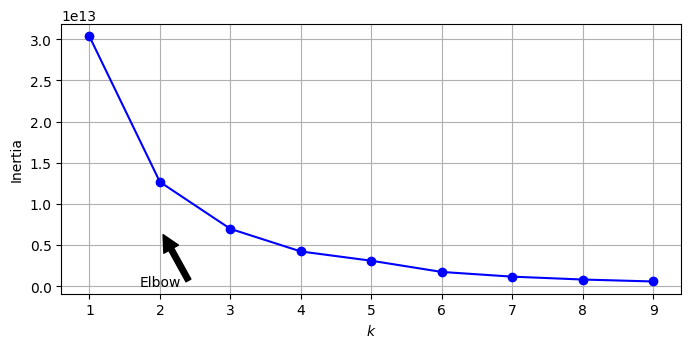

In [133]:
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(2, inertias[2]), xytext=(2.45, 5.50),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(2.0, 660, "Elbow", horizontalalignment="center")

plt.grid()

plt.show()

#### Silouette Method

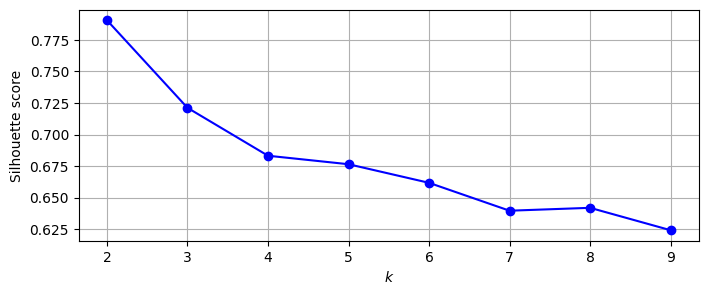

In [48]:
from sklearn.metrics import silhouette_score




silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
#plt.axis([1.0, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7904566018818395
For n_clusters = 3 The average silhouette_score is : 0.7211355150939911
For n_clusters = 4 The average silhouette_score is : 0.672138266332032
For n_clusters = 5 The average silhouette_score is : 0.6730641456052135
For n_clusters = 6 The average silhouette_score is : 0.6540629798509474


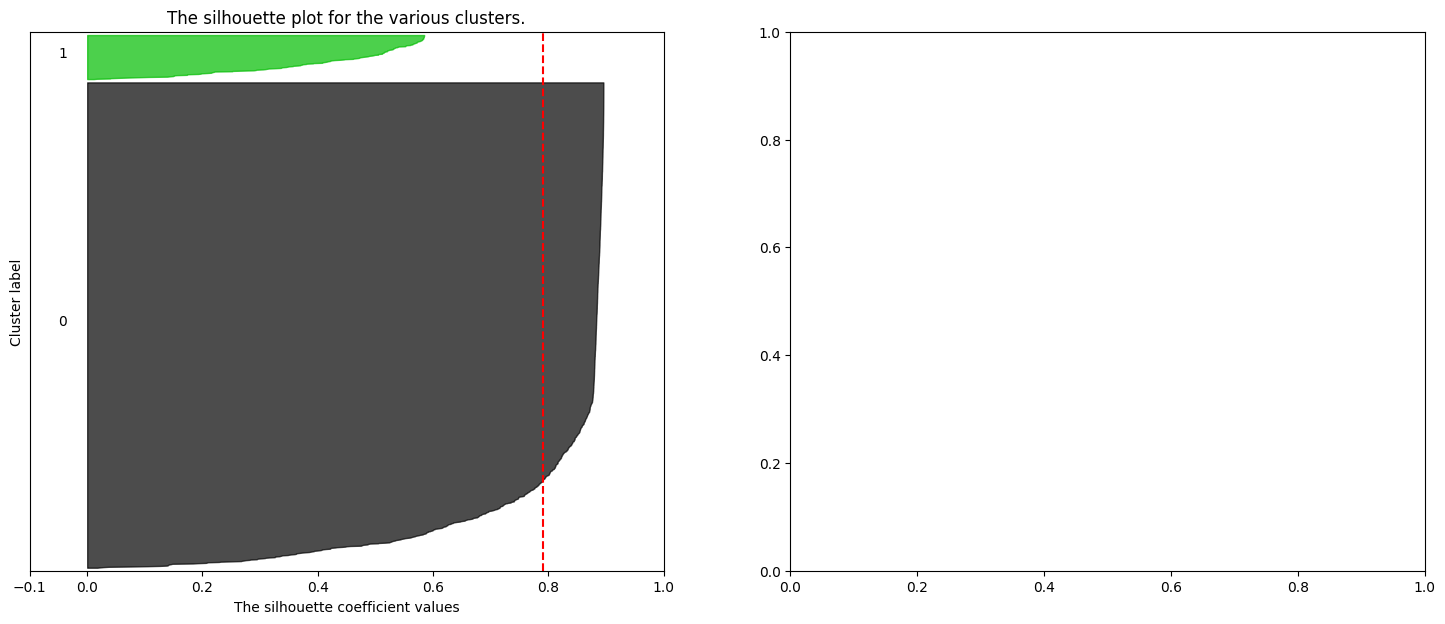

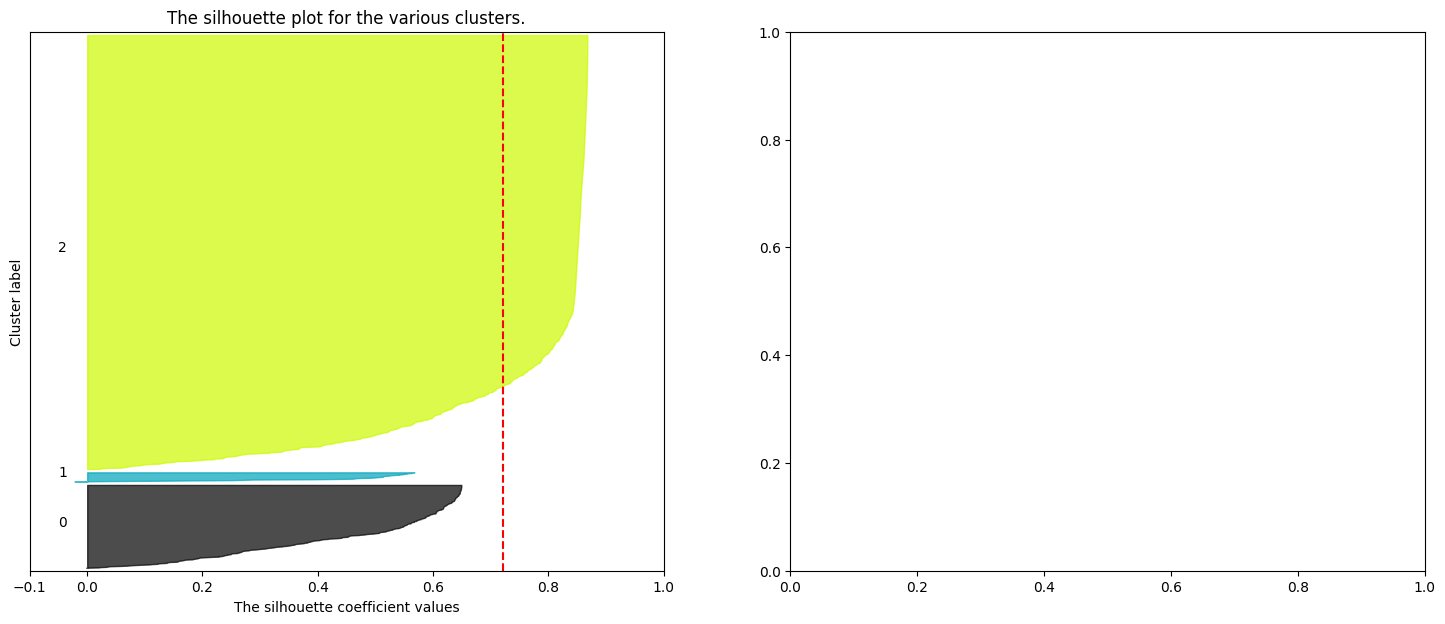

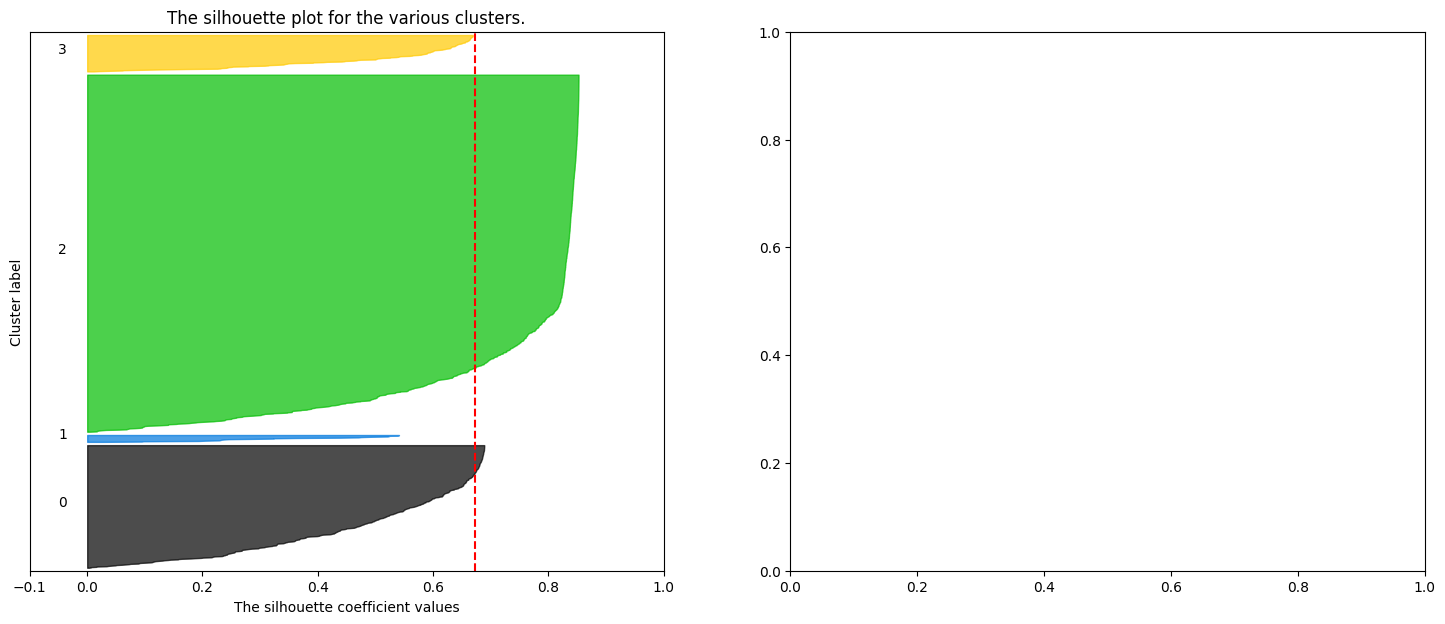

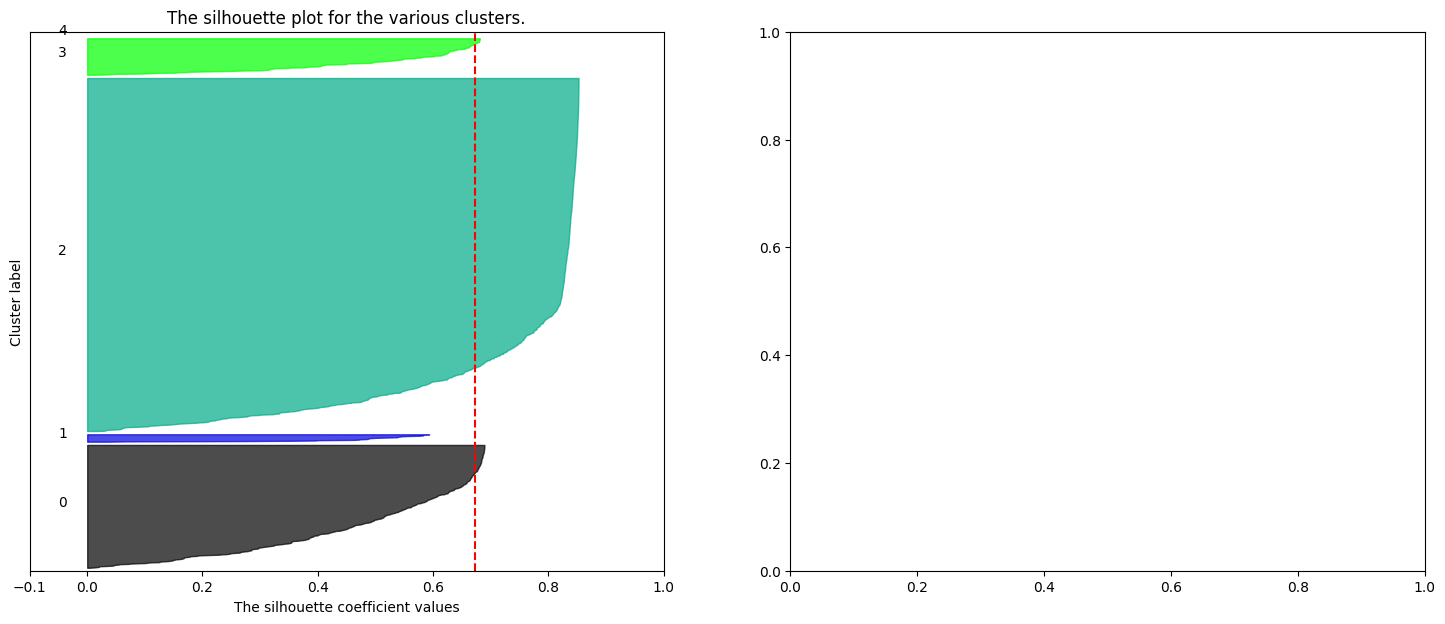

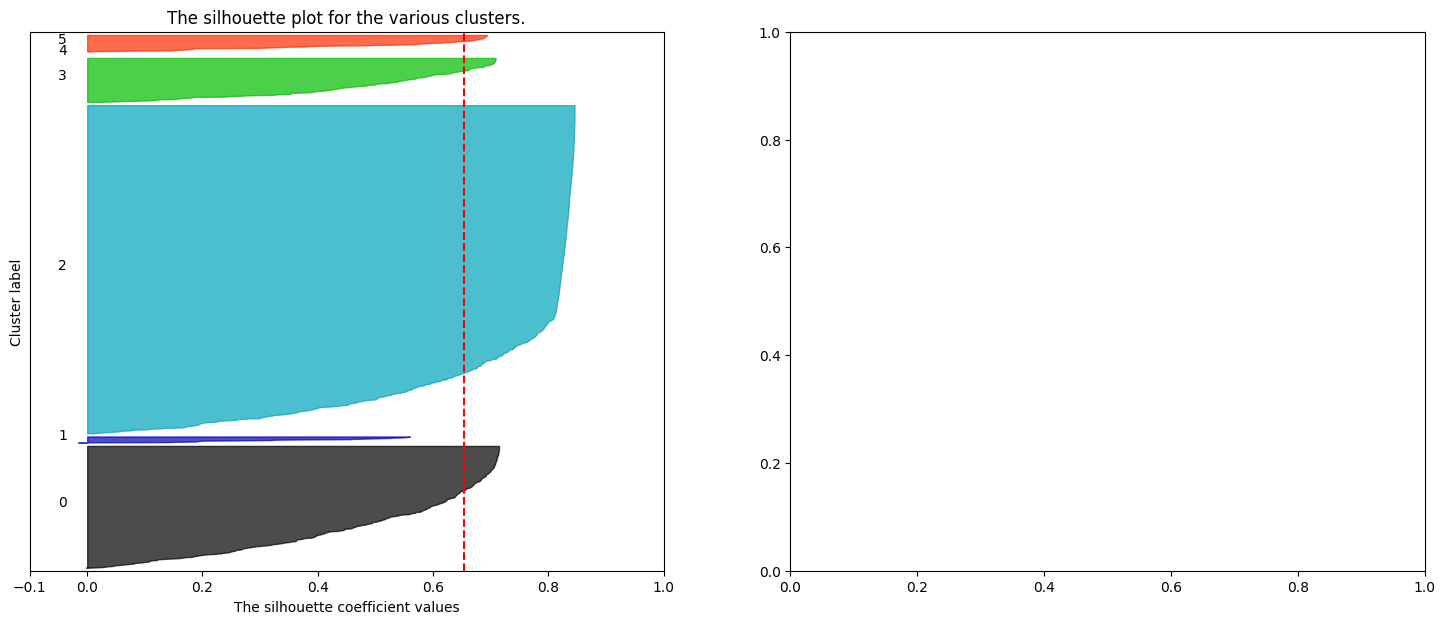

In [60]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

## 6. K-means clustering
### Based on the previous we asume 2 clusters

In [144]:
k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [145]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [146]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


In [147]:
X

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,TypeFlag_ER,TypeFlag_INP
MemberID,,,,,,
2f83e2ef,0,280.700,0,71.619439,1,0
26438e33,0,388.185,0,75.077344,2,0
cd725d86,0,433.300,0,70.603696,1,0
c45c8ba3,0,492.100,0,66.193018,1,0
9e636133,0,550.200,0,74.217659,1,0
...,...,...,...,...,...,...
54dabc09,25,1026046.063,72,80.851472,2,4
e8b6b438,64,1033237.527,59,73.002053,6,13
c1fb6713,67,1107621.039,80,68.462697,0,4


In [148]:
# prompt: attach y_pred to X

# Add y_pred as a new column to X
X['y_pred'] = y_pred
X

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,TypeFlag_ER,TypeFlag_INP,y_pred
MemberID,,,,,,,
2f83e2ef,0,280.700,0,71.619439,1,0,0
26438e33,0,388.185,0,75.077344,2,0,0
cd725d86,0,433.300,0,70.603696,1,0,0
c45c8ba3,0,492.100,0,66.193018,1,0,0
9e636133,0,550.200,0,74.217659,1,0,0
...,...,...,...,...,...,...,...
54dabc09,25,1026046.063,72,80.851472,2,4,1
e8b6b438,64,1033237.527,59,73.002053,6,13,1
c1fb6713,67,1107621.039,80,68.462697,0,4,1


In [150]:
fig = px.parallel_coordinates(X, color="y_pred",
                              dimensions=['LifeThreateningEvent', 'TotalExpenses', 'MedicalTreatmentDuration',
                                          'AgeAtMedicalEvent'],
                              color_continuous_scale=px.colors.diverging.PuOr
                              )
fig.show()

### Based on the previous figure we observe the existence of two clusters of patients:
#### Cluster 0 (Brown Color). Patients with relatively low Medical Treatment Duration, lower Total Expenses and lower number of Life Threatening Events.
#### Cluster 1 (Blue Color). Patients with relatively higher Medical Treatment Duration, higher Total Expenses and higher number of Life Threatening Events.


## 5. Let's train a DBSCAN clusterer


In [185]:
from sklearn.cluster import DBSCAN

import numpy as np

In [186]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [223]:
X

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,TypeFlag_ER,TypeFlag_INP,y_pred
MemberID,,,,,,,
2f83e2ef,0,280.700,0,71.619439,1,0,0
26438e33,0,388.185,0,75.077344,2,0,0
cd725d86,0,433.300,0,70.603696,1,0,0
c45c8ba3,0,492.100,0,66.193018,1,0,0
9e636133,0,550.200,0,74.217659,1,0,0
...,...,...,...,...,...,...,...
54dabc09,25,1026046.063,72,80.851472,2,4,-1
e8b6b438,64,1033237.527,59,73.002053,6,13,-1
c1fb6713,67,1107621.039,80,68.462697,0,4,-1


In [224]:
X.drop(['y_pred','TypeFlag_ER','TypeFlag_INP'],inplace=True,axis=1)

In [225]:
X

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent
MemberID,,,,
2f83e2ef,0,280.700,0,71.619439
26438e33,0,388.185,0,75.077344
cd725d86,0,433.300,0,70.603696
c45c8ba3,0,492.100,0,66.193018
9e636133,0,550.200,0,74.217659
...,...,...,...,...
54dabc09,25,1026046.063,72,80.851472
e8b6b438,64,1033237.527,59,73.002053
c1fb6713,67,1107621.039,80,68.462697


In [226]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

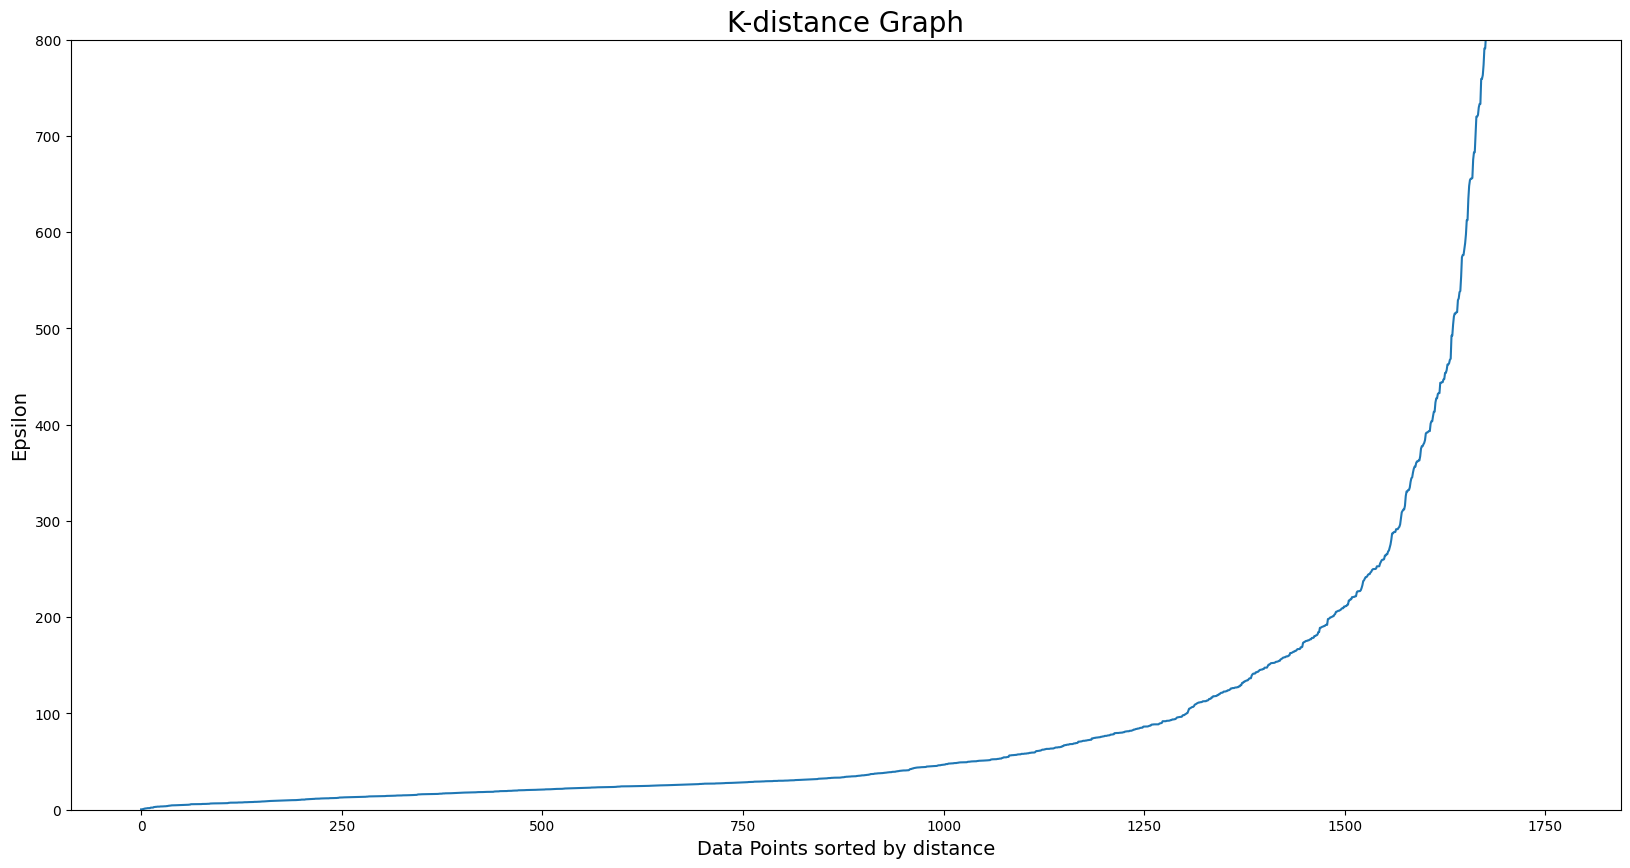

In [227]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.ylim(0, 800)  # Example: Set the y-axis range from 0 to 800
plt.show()

In [263]:
dbscan = DBSCAN(eps=1700, min_samples=10)
y_pred=dbscan.fit_predict(X)


In [264]:
labels = dbscan.labels_
labels

array([ 0,  0,  0, ..., -1, -1, -1])

In [265]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print("number of labels :",labels_unique)

number of estimated clusters : 7
number of labels : [-1  0  1  2  3  4  5]


In [266]:
# Add y_pred as a new column to X
X['y_pred'] = y_pred
X

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,y_pred
MemberID,,,,,
2f83e2ef,0,280.700,0,71.619439,0
26438e33,0,388.185,0,75.077344,0
cd725d86,0,433.300,0,70.603696,0
c45c8ba3,0,492.100,0,66.193018,0
9e636133,0,550.200,0,74.217659,0
...,...,...,...,...,...
54dabc09,25,1026046.063,72,80.851472,-1
e8b6b438,64,1033237.527,59,73.002053,-1
c1fb6713,67,1107621.039,80,68.462697,-1


In [267]:
X.groupby('y_pred').count()

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent
y_pred,,,,
-1,267,267,267,267
0,1374,1374,1374,1374
1,20,20,20,20
2,24,24,24,24
3,28,28,28,28
4,20,20,20,20
5,24,24,24,24


In [268]:
X[X['y_pred']!=-1]

,LifeThreateningEvent,TotalExpenses,MedicalTreatmentDuration,AgeAtMedicalEvent,y_pred
MemberID,,,,,
2f83e2ef,0,280.700,0,71.619439,0
26438e33,0,388.185,0,75.077344,0
cd725d86,0,433.300,0,70.603696,0
c45c8ba3,0,492.100,0,66.193018,0
9e636133,0,550.200,0,74.217659,0
...,...,...,...,...,...
d5f8eaa2,0,154958.265,10,69.815195,5
47efcec9,0,155274.056,12,72.287474,5
bd3a2658,42,156010.736,10,79.895962,5


In [269]:
fig = px.parallel_coordinates(X[X['y_pred']!=-1], color="y_pred",
                              dimensions=['LifeThreateningEvent', 'TotalExpenses', 'MedicalTreatmentDuration',
                                          'AgeAtMedicalEvent'],

                              )
fig.show()